In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [120]:
breast_cancer = datasets.load_breast_cancer()

breast_cancer_df = pd.DataFrame(
    data=np.c_[breast_cancer['data'], breast_cancer['target']],
    columns=breast_cancer['feature_names'].tolist() + ['target']
)

print(breast_cancer_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Data quality assessment

In [121]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [122]:
breast_cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [123]:
breast_cancer_df.duplicated().sum()

0

In [124]:
for feature in breast_cancer_df.columns:
    print({feature: breast_cancer_df[feature].nunique()})

{'mean radius': 456}
{'mean texture': 479}
{'mean perimeter': 522}
{'mean area': 539}
{'mean smoothness': 474}
{'mean compactness': 537}
{'mean concavity': 537}
{'mean concave points': 542}
{'mean symmetry': 432}
{'mean fractal dimension': 499}
{'radius error': 540}
{'texture error': 519}
{'perimeter error': 533}
{'area error': 528}
{'smoothness error': 547}
{'compactness error': 541}
{'concavity error': 533}
{'concave points error': 507}
{'symmetry error': 498}
{'fractal dimension error': 545}
{'worst radius': 457}
{'worst texture': 511}
{'worst perimeter': 514}
{'worst area': 544}
{'worst smoothness': 411}
{'worst compactness': 529}
{'worst concavity': 539}
{'worst concave points': 492}
{'worst symmetry': 500}
{'worst fractal dimension': 535}
{'target': 2}


## Data Splitting

In [125]:
x = breast_cancer_df.drop('target', axis=1)

y = breast_cancer_df['target']

In [126]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 0)

In [127]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

## KNN

In [128]:
train_accuracies = []
test_accuracies = []

In [129]:
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)
    
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_score)
    test_accuracies.append(test_score)
    
    print(f"K={k}: Train Accuracy = {train_score:.2f}, Test Accuracy = {test_score:.2f}")

K=1: Train Accuracy = 1.00, Test Accuracy = 0.91
K=2: Train Accuracy = 0.96, Test Accuracy = 0.89
K=3: Train Accuracy = 0.96, Test Accuracy = 0.91
K=4: Train Accuracy = 0.95, Test Accuracy = 0.92
K=5: Train Accuracy = 0.95, Test Accuracy = 0.94
K=6: Train Accuracy = 0.94, Test Accuracy = 0.94
K=7: Train Accuracy = 0.93, Test Accuracy = 0.95
K=8: Train Accuracy = 0.94, Test Accuracy = 0.95
K=9: Train Accuracy = 0.94, Test Accuracy = 0.96
K=10: Train Accuracy = 0.94, Test Accuracy = 0.95
K=11: Train Accuracy = 0.94, Test Accuracy = 0.96
K=12: Train Accuracy = 0.94, Test Accuracy = 0.96
K=13: Train Accuracy = 0.93, Test Accuracy = 0.96
K=14: Train Accuracy = 0.93, Test Accuracy = 0.96
K=15: Train Accuracy = 0.93, Test Accuracy = 0.96


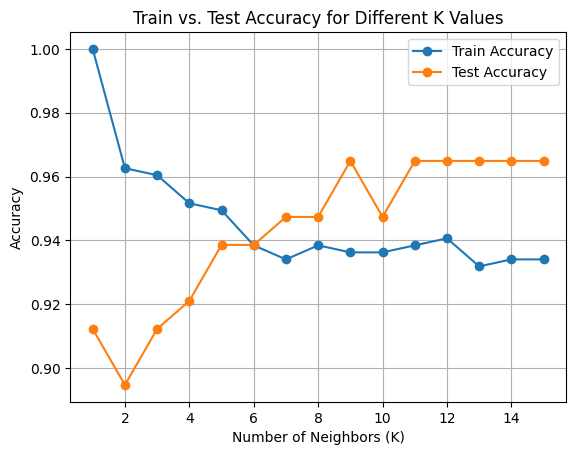

In [130]:
plt.plot(range(1, 16), train_accuracies, marker='o', label="Train Accuracy")
plt.plot(range(1, 16), test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy for Different K Values")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
K=15
knn=KNeighborsClassifier(K)
knn.fit(x_train, y_train)
y_pred_sklearn= knn.predict(x_test)
print(y_pred_sklearn)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]


## K-Fold

In [132]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=15)

scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Median accuracy: {np.median(scores):.2f}")
print(f"Standard deviation: {np.std(scores):.2f}")
print(f"Minimum accuracy: {np.min(scores):.2f}")
print(f"Maximum accuracy: {np.max(scores):.2f}")

Accuracy scores for each fold: [0.95614035 0.97368421 0.95614035 0.95614035 0.9380531 ]
Mean accuracy: 0.96
Median accuracy: 0.96
Standard deviation: 0.01
Minimum accuracy: 0.94
Maximum accuracy: 0.97
